# Contents <a id='back'></a>

* [Introduction](#intro)
* [1. Data Overview](#data_review)
    * [Conclusions](#data_review_conclusions)
* [2. Data Pre-Processing](#data_preprocessing)
    * [2.1 Data Transformation](#transformation)
    * [2.2 Duplicates](#missing_values)
    * [2.3 Data Categorization](#categorization)
    * [2.4 Missing Values](#missing_values)
* [3. Hypothesis](#hypotheses)
    * [3.1 Hypothesis 1: Is there a correlation between having children and paying back on time?](#children)
    * [3.2 Hypothesis 2: Is there a correlation between family status and paying back on time?](#family_status)
    * [3.3 Hypothesis 3: Is there a correlation between income level and paying back on time?](#income_level)
    * [3.4 Hypothesis 4: Is there a correlation between the length of employment and paying back on time?](#length_of_employment)
    * [3.5 Hypothesis 5:  Is there a correlation between age and paying back on time?](#age)
    * [3.6 Hypothesis 6:  How does the loan purpose affect the automatic rate?](#purpose)
* [General Conclusion](#end)

## Introduction <a id='intro'></a>
This project is to prepare a report for the credit department of a bank. I will find out the influence of a customer's marital status and number of children on the probability of timely loan repayment. The bank already has some data regarding the creditworthiness of customers.


### Objective: 
To make a report that will be considered when making a credit assessment for prospective customers. A credit assessment is used to evaluate the ability of potential borrowers to repay their loans.

### Steps
This project will consist of three stages:

1. Exploratory Data Analysis
2. Data Preprocessing (Handle Missing Values, Handle Outliers, Handle Duplicate Data)
3. Hypothesis Testing

 
[Back to Contents](#back)

## 1. Data Overview <a id='data_review'></a>

[Back to Contents](#back)

Start by importing libraries and loading the data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
df = pd.read_csv('data/credit_scoring_eng.csv')
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [3]:
df.shape

(21525, 12)

In [4]:
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Findings**

There are missing values in the columns days_employed and total_income, because the number of rows should be 21,525

In [6]:
df_missing_values = df.loc[(df['days_employed'].isna()) & (df['total_income'].isna())]
df_missing_values

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


**Findings**

1. In the displayed table, both columns appear to be symmetric. For example, in row 12, when days_employed = NaN, total_income is also NaN.
2. This is further reinforced by the fact that there are 2174 rows where both days_employed and total_income have no values (missing values). The total count of missing values is 2174, confirming the symmetry in data loss.

In [7]:
df.isna().sum() / len(df)

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

**Findings**

The missing value percentage is 10%

In [8]:
columns_distribution = ['children', 'dob_years', 'education', 'family_status', 'gender', 'income_type', 'debt']
for column in columns_distribution:
    print(column)
    print(sorted(df_missing_values[column].unique()))
    print()

children
[-1, 0, 1, 2, 3, 4, 5, 20]

dob_years
[0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]

education
["BACHELOR'S DEGREE", "Bachelor's Degree", 'PRIMARY EDUCATION', 'Primary Education', 'SECONDARY EDUCATION', 'SOME COLLEGE', 'Secondary Education', 'Some College', "bachelor's degree", 'primary education', 'secondary education', 'some college']

family_status
['civil partnership', 'divorced', 'married', 'unmarried', 'widow / widower']

gender
['F', 'M']

income_type
['business', 'civil servant', 'employee', 'entrepreneur', 'retiree']

debt
[0, 1]



**Findings in df_missing_values**

1. In the "children" column, there are unusual values, namely -1 and 20.
2. In the "dob_years" column, there is an unusual value, which is 0.
3. In the "education" column, there are non-standard values, for example, "SOME COLLEGE" and "Some College."
4. In the filtered table's income_type, there are no 'student' or 'unemployed' job types. This makes sense because both of these job types do not involve employment, hence the data for days_employed and total_income are left empty.

In [9]:
columns_distribution = ['children', 'dob_years', 'education', 'family_status', 'gender', 'income_type', 'debt']
for column in columns_distribution:
    print(column)
    print(sorted(df[column].unique()))
    print()

children
[-1, 0, 1, 2, 3, 4, 5, 20]

dob_years
[0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]

education
["BACHELOR'S DEGREE", "Bachelor's Degree", 'GRADUATE DEGREE', 'Graduate Degree', 'PRIMARY EDUCATION', 'Primary Education', 'SECONDARY EDUCATION', 'SOME COLLEGE', 'Secondary Education', 'Some College', "bachelor's degree", 'graduate degree', 'primary education', 'secondary education', 'some college']

family_status
['civil partnership', 'divorced', 'married', 'unmarried', 'widow / widower']

gender
['F', 'M', 'XNA']

income_type
['business', 'civil servant', 'employee', 'entrepreneur', 'paternity / maternity leave', 'retiree', 'student', 'unemployed']

debt
[0, 1]



In [10]:
print('dataset df:')
print(df['income_type'].value_counts())
print()
print('dataset filtered:')
print((df_missing_values['income_type'].value_counts()))

dataset df:
income_type
employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: count, dtype: int64

dataset filtered:
income_type
employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: count, dtype: int64


**Findings**
1. The distribution in the dataset can be considered quite similar to the filtered dataset.
2. However, there are several values that were not found in the filtered dataset, such as 'student,' 'unemployed,' and 'paternity/maternity leave' under the job type, which were not present in the filtered table.
3. There are differences in the values in the education column.
4. Most likely, the data in income_type and education are categories that are related to the missing values.

In [11]:
print('dataset df:', sorted(df['income_type'].unique()))
print('dataset filter:', sorted(df_missing_values['income_type'].unique()))

dataset df: ['business', 'civil servant', 'employee', 'entrepreneur', 'paternity / maternity leave', 'retiree', 'student', 'unemployed']
dataset filter: ['business', 'civil servant', 'employee', 'entrepreneur', 'retiree']


In [12]:
print('dataset df:', sorted(df['education'].str.lower().unique()))
print('dataset filter:', sorted(df_missing_values['education'].str.lower().unique()))

dataset df: ["bachelor's degree", 'graduate degree', 'primary education', 'secondary education', 'some college']
dataset filter: ["bachelor's degree", 'primary education', 'secondary education', 'some college']


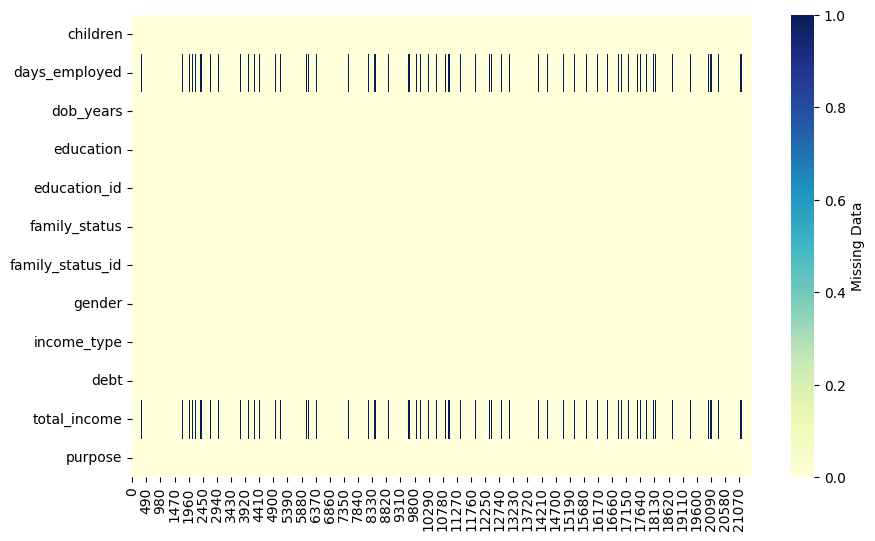

In [13]:
# Visualizing Missing Data using a seaborn heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

**Findings:**

Based on the data visualization, missing values are not random.

**Conclusion** <a id='data_review_conclusions'></a>

1. Missing values form a pattern. The missing values are caused by job types where clients with the job types 'student' and 'unemployed' do not have any income, leading them to leave the 'days_employed' and 'total_income' columns empty.
2. This conclusion is reinforced by the pattern shown in the seaborn heatmap, indicating that when the value in the 'days_employed' column is missing, the data in the same row for 'total_income' is also missing (symmetrical).

**Steps to handle missing values issue**

Background: Since the missing values are only present in the 'days_employed' and 'total_income' columns, and both of these columns have float data types, which fall under the Numeric/Ratio category, the missing data will be filled using statistical calculations such as mean, median, mode, etc.

The following are the steps to resolve each data issue:
1. Handling missing data > Filling missing values using statistical calculations.
2. Identifying duplicate data > Removing duplicate entries.
3. Standardizing spellings > for example: changing "GRADUATE DEGREE" to "Graduate Degree."
4. Identifying outliers > Removing outliers.
5. Identifying incorrect data (negative 'days_employed,' age 0 but having income & job) -> Replacing incorrect values.

[Back to Contents](#back)

## 2. Data Preprocessing <a id='data_preprocessing'></a>

[Back to Contents](#back)

### 2.1 Data Transformation <a id='transformation'></a>

#### education column

In [14]:
# 'education' column
sorted(df['education'].unique())

["BACHELOR'S DEGREE",
 "Bachelor's Degree",
 'GRADUATE DEGREE',
 'Graduate Degree',
 'PRIMARY EDUCATION',
 'Primary Education',
 'SECONDARY EDUCATION',
 'SOME COLLEGE',
 'Secondary Education',
 'Some College',
 "bachelor's degree",
 'graduate degree',
 'primary education',
 'secondary education',
 'some college']

In [15]:
# Standardizing spellings
df['education'] = df['education'].str.lower()

In [16]:
# Verify the changes
sorted(df['education'].unique())


["bachelor's degree",
 'graduate degree',
 'primary education',
 'secondary education',
 'some college']

In [17]:
# Check duplicate data in column 'education'
df['education'].duplicated().sum()

21520

In [18]:
# Check data distribution in column children
sorted(df['children'].unique())

[-1, 0, 1, 2, 3, 4, 5, 20]

In [19]:
# Check the percentage
len(df.loc[(df['children']== -1) | (df['children']== 20)]) / len(df)

0.005714285714285714

**Findings**
1. As seen in the cell above, the percentage of problematic data is very small, which is 0.57%.
2. Since these data points are considered outliers or inconsistent, they will be replaced with the median value.

#### children column

<Axes: >

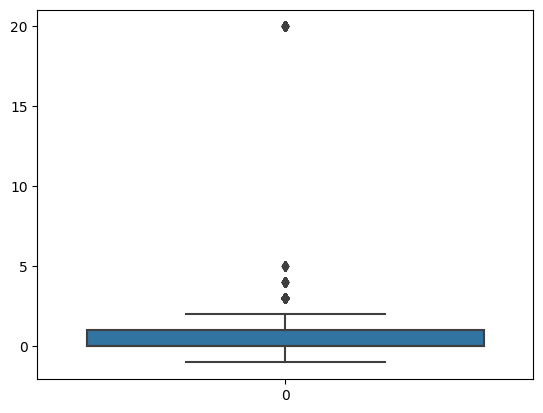

In [21]:
# check outlier in children column
sns.boxplot(df['children'])

In [22]:
# check statistical data in children
df['children'].describe()

count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

**Findings**

1. Based on the statistical data above, I will replace the value 20 with the value 2, assuming it was an input error.
2. I will remove minus sign (-), assuming it was an input error

In [23]:
condition_children = df['children']==20
df['children'] = df['children'].mask(condition_children, 2)

In [24]:
# remove minus sign
df['children'] = abs(df['children'])

In [25]:
# Verify the data
sorted(df['children'].unique())

[0, 1, 2, 3, 4, 5]

#### days_employed column

In [26]:
# Check data
df['days_employed'].unique()

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

<Axes: >

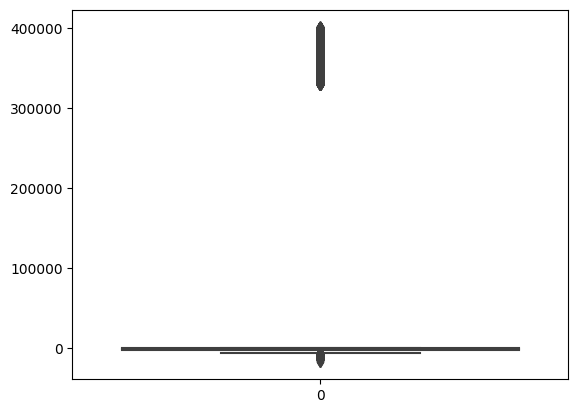

In [28]:
# visualize the data
sns.boxplot(df['days_employed'])

**Findings**

Problematic data is identified as data with a negative sign and values that are too large (outliers).

In [29]:
# check percentage
len(df.loc[(df['days_employed'] < 0 ) | (df['days_employed'] > 200000)]) / len(df)

0.8990011614401858

**Findings**

1. There are 2 issues identified in the 'days_employed' column:
    - Too many digits after the decimal point.
    - Existence of negative values and outliers, with a high percentage of rows having these conditions, approximately 89%.

2. The steps to solve these issues are as follows:
    - Remove the minus sign (-).
    - Perform rounding.
    - Replace the outlier values.

In [30]:
# remove minus sign (-), assuming it was an input error
df['days_employed'] = abs(df['days_employed'])

In [31]:
# round 
df['days_employed'] = round(df['days_employed'],0)

In [32]:
# check data distribution
df['days_employed'].describe()

count     19351.000000
mean      66914.727973
std      139030.879631
min          24.000000
25%         927.000000
50%        2194.000000
75%        5538.000000
max      401755.000000
Name: days_employed, dtype: float64

**Findings**

The mean value does not represent the data as it is mixed with outliers.
Therefore, the replacement of outliers will be done using the median value.

In [33]:
# Replace outlier with median
condition_de = (df['days_employed'] > 200000) & (df['days_employed'].notnull())
df['days_employed'] = df['days_employed'].mask(condition_de, df['days_employed'].median())

In [34]:
# verify the data
df['days_employed'].unique()

array([8438., 4025., 5623., ...,  921., 8799., 9929.])

<Axes: >

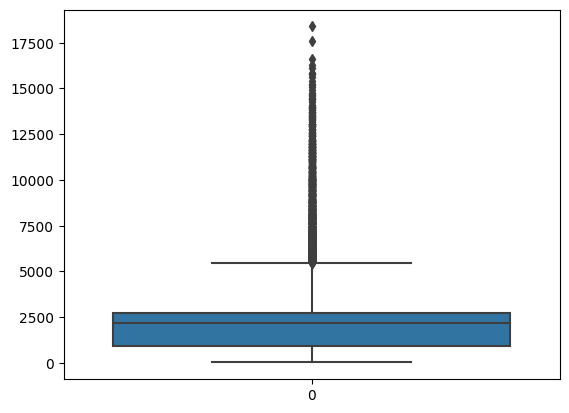

In [36]:
# visualize the data
sns.boxplot(df['days_employed'])

#### dob_years column

In [37]:
# check data
sorted(df['dob_years'].unique())

[0,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

**Findings**

There is an issue with the data where 'dob_years' (date of birth years) is equal to 0 because it is not possible for someone to apply for credit at the age of 0.

In [38]:
# check statistical data
df['dob_years'].describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

**Findings**

Since the mean and median values are close, we will use the mean value to replace the value of 0.

In [39]:
# replace 0 value
condition_dob = df['dob_years']==0
df['dob_years'] = df['dob_years'].mask(condition_dob, df['dob_years'].median())

In [40]:
# verify the data
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51, 59, 29, 60, 55, 58, 71, 22, 73, 66,
       69, 19, 72, 70, 74, 75])

#### family_status column

In [42]:
# check data
df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

**Findings**

There are no issues on 'family_status' column.

#### gender column

In [43]:
# check data
df['gender'].unique()


array(['F', 'M', 'XNA'], dtype=object)

In [44]:
# check most often values
df['gender'].mode()

0    F
Name: gender, dtype: object

**Findings**

1. There is an unusual value, 'XNA.'
2. The value 'XNA' will be replaced with the most frequent value (mode).

In [45]:
# replace XNA with F
df['gender'] = df['gender'].replace('XNA', 'F')

In [46]:
# verify the data
df['gender'].unique()

array(['F', 'M'], dtype=object)

#### income_type column

In [47]:
# check data
df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

**Findings**

There are no issues on 'gender' column.

### 2.2 Check Duplicate data <a id='duplicates'></a>

In [48]:
# check duplicate data
df.duplicated().sum()

72

**Findings**

1. There are 72 identified duplicate data entries.
2. These duplicate data entries will be removed, and the index will be reset.

In [49]:
# remove duplicate data and do reset index
df = df.drop_duplicates().reset_index(drop=True)

In [50]:
# verify the data
df.duplicated().sum()

0

**Dataset after pre-processing data**

**Changes that have been made:**
1. For the 'days_employed' column:
    - Removed the minus sign (-).
    - Replaced outlier values.
    - Rounded the values.

2. For the 'education' column:
    - Performed data transformation by replacing data with different spellings but actually having the same value.

3. For the 'children' column:
    - Replaced outlier values with the median.

4. For the 'dob_years' column:
    - Replaced data with a value of 0 with the mean.

5. For the 'gender' column:
    - Replaced data with the value 'XNA' with the most frequent value (mode).

6. Deleted 72 duplicate data points, resulting in a reduction from the initial 21,525 entries to 21,453.

7. Reset the index after removing duplicate entries.

In [51]:
df.shape

(21453, 12)

## Check Mean and Median of the Data

In [52]:
# function to calculate mean or median
def median_mean(data, selected_column, value):
    if value == 'mean':
        return data[selected_column].mean()
    elif value == 'median' :
        return data[selected_column].median()

In [53]:
# verify the function
median_mean(df, 'days_employed', 'mean')

2324.706423440649

In [54]:
# verify the function
median_mean(df, 'total_income', 'mean')

26787.56835465867

### 2.3 Data Categorization <a id='categorization'></a>

Based on the following source: https://www.thepinnaclelist.com/articles/9-factors-that-every-bank-take-into-consideration-before-lending-money-to-home-buyers/ there are several factors that banks consider when lending money:
1. Credit History: shown in the dataset as 'debt.'
2. Occupation: shown in the dataset as 'income_type' and days_employed. The dataset has categorized the  income type.
3. Age: shown in the dataset as 'age'
4. Distance: not shown in the dataset.
5. Work Experience: not shown in the dataset.
6. Income source of the spouse: not shown in the dataset
7. Relationship with the bank: not shown in the dataset
8. Purpose of the loan: shown in the dataset as 'purpose'
9. Surplus income: shown in the dataset as 'total_income'

The above data will be categorized to test the hypotheses.

#### Grouping of Debt status

In [55]:
# Function to categorize debt status
def replace_debt_value(value):
    if value == 1:
        value = str(value)
        return value.replace(value, 'Ever failed to pay')
    elif value == 0:
        value = str(value)
        return value.replace(value, 'Never failed to pay')

In [56]:
# verify the function
replace_debt_value(0)

'Never failed to pay'

In [57]:
# apply the function in a new column
df['debt_status'] = df['debt'].apply(replace_debt_value)
df['debt_status'].value_counts()

debt_status
Never failed to pay    19712
Ever failed to pay      1741
Name: count, dtype: int64

In [59]:
# verify the data
df[['debt','debt_status']]

,debt,debt_status
0,0,Never failed to pay
1,0,Never failed to pay
2,0,Never failed to pay
3,0,Never failed to pay
4,0,Never failed to pay
...,...,...
21448,0,Never failed to pay
21449,0,Never failed to pay
21450,1,Ever failed to pay
21451,1,Ever failed to pay


#### Grouping of Days Employed

In [60]:
# function to categorize days employed
def employee_length_category(employee):
    if employee <= 1024 and employee > 23:
        return 'Little Work Experience'
    elif employee <= 2194 and employee > 1024:
        return 'Moderate Work Experience'
    elif employee <= 3570 and employee > 2194:
        return 'Considerable Work Experience'
    elif employee > 3570:
        return 'Extensive Work Experience'
    return 'unknown'

In [91]:
# apply the function in a new column
df['length_of_employment'] = df['days_employed'].apply(employee_length_category)
df[['days_employed','length_of_employment']]

,days_employed,length_of_employment
0,8438.0,Extensive Work Experience
1,4025.0,Extensive Work Experience
2,5623.0,Extensive Work Experience
3,4125.0,Extensive Work Experience
4,2194.0,Moderate Work Experience
...,...,...
21448,4529.0,Extensive Work Experience
21449,2194.0,Moderate Work Experience
21450,2113.0,Moderate Work Experience
21451,3112.0,Considerable Work Experience


In [62]:
# check data distribution
df['employee_length_category'].value_counts()

employee_length_category
Moderate Work Experience        7751
Little Work Experience          5371
Extensive Work Experience       3259
Considerable Work Experience    2970
unknown                         2102
Name: count, dtype: int64

#### Grouping of Age

In [63]:
# check min and max value of dob_years
print(df['dob_years'].min())
(df['dob_years'].max())

19


75

In [64]:
# function to categorize age range
# reference: https://pubmed.ncbi.nlm.nih.gov/7203662/
def age_category(age):
    if age <22:
        return 'Teenagers: <22'
    elif age <= 34 and age >= 22:
        return 'Young Adults: 22-34'
    elif age <= 44 and age > 34:
        return 'Early Middle-Aged Adults: 35-44'
    elif age <= 64 and age > 44:
        return 'Late Middle-aged Adults: 45-64'
    elif age > 65:
        return 'Old Adults: >65'
    return 'unknown'

In [65]:
# verify the function
age_category(19)

'Teenagers: <22'

In [66]:
# apply the function in a new column
df['age_category'] = df['dob_years'].apply(age_category)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,debt_status,employee_length_category,age_category
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,Never failed to pay,Extensive Work Experience,Early Middle-Aged Adults: 35-44
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,Never failed to pay,Extensive Work Experience,Early Middle-Aged Adults: 35-44
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,Never failed to pay,Extensive Work Experience,Young Adults: 22-34
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,Never failed to pay,Extensive Work Experience,Young Adults: 22-34
4,0,2194.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,Never failed to pay,Moderate Work Experience,Late Middle-aged Adults: 45-64


In [68]:
# check data distribution
df['age_category'].value_counts()

age_category
Late Middle-aged Adults: 45-64     8751
Early Middle-Aged Adults: 35-44    5840
Young Adults: 22-34                5791
Old Adults: >65                     702
unknown                             193
Teenagers: <22                      176
Name: count, dtype: int64

#### Grouping of Loan Purpose

In [69]:
# function to categorize purpose
def purpose_category(purpose):
    if 'car' in purpose:
        return 'Car'
    elif 'hous' in purpose:
        return 'House/Property'
    elif 'property' in purpose:
        return 'House/Property'
    elif 'educ' in purpose:
        return 'Education'
    elif 'university' in purpose:
        return 'Education'
    elif 'wedding' in purpose:
        return 'Wedding'
    elif 'real estate' in purpose:
        return 'Real Estate'
    return 'undefined'

In [70]:
# verify the function
purpose_category('to become educated')

'Education'

In [71]:
# apply the function in a new column
df['purpose_category'] = df['purpose'].apply(purpose_category)
df['purpose_category'].value_counts()

purpose_category
House/Property    6347
Real Estate       4464
Car               4306
Education         4013
Wedding           2323
Name: count, dtype: int64

In [72]:
df[['purpose', 'purpose_category']]

,purpose,purpose_category
0,purchase of the house,House/Property
1,car purchase,Car
2,purchase of the house,House/Property
3,supplementary education,Education
4,to have a wedding,Wedding
...,...,...
21448,housing transactions,House/Property
21449,purchase of a car,Car
21450,property,House/Property
21451,buying my own car,Car


#### Grouping of total income

In [73]:
df['total_income'].describe()

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

In [74]:
# function to categorize total_income
def income_category(income):
    if income <= 17219 and income > 3305:
        return 'Lower Range'
    elif income <= 23202 and income > 17219:
        return 'Middle Range'
    elif income <= 31331 and income > 23202:
        return 'Upper-Mid Range'
    elif income > 31331:
        return 'High Range'
    return 'unknown'

In [75]:
# apply the function in a new column
df['income_category'] = df['total_income'].apply(income_category)
df[['total_income','income_category']]

,total_income,income_category
0,40620.102,High Range
1,17932.802,Middle Range
2,23341.752,Upper-Mid Range
3,42820.568,High Range
4,25378.572,Upper-Mid Range
...,...,...
21448,35966.698,High Range
21449,24959.969,Upper-Mid Range
21450,14347.610,Lower Range
21451,39054.888,High Range


In [76]:
# check data distribution
df['income_category'].value_counts()

income_category
High Range         5364
Lower Range        5363
Middle Range       4312
Upper-Mid Range    4312
unknown            2102
Name: count, dtype: int64

### 2.4 Working with missing values <a id='missing_values'></a>

There are 2 columns with missing values:
1. total_income
2. days_employed

In [77]:
#  function to fill in missing values
def data_imputation(data, column_grouping, column_selected):
    # Parameter meaning
    # data => The name of the dataframe to be processed
    # column_grouping => The column used to group values and take the median
    # column_selected => The column in which we will fill its NaN values

    # Get unique category groups
    group = data[column_grouping].unique()

    # Loop through each value in the group category
    for value in group:
        # get median
        median = data.loc[(data[column_grouping]==value) & ~(data[column_selected].isna()), column_selected].median()

        # change missing value
        data.loc[(data[column_grouping]==value) & (data[column_selected].isna()), column_selected] = median

    # Return the dataframe after filling the missing values
    return data

#### Fixing the missing value in total_income

Median is used to fill missing values in the new column because it can prevent the occurrence of outliers (source: https://stats.stackexchange.com/questions/143700/which-is-better-replacement-by-mean-and-replacement-by-median)

In [78]:
# apply the function in a new column
df = data_imputation(data=df, column_grouping='age_category', column_selected='total_income')

In [79]:
# verify the data
df['total_income'].isna().sum()

0

#### Fixing the missing values in days_employed

In [80]:
df['days_employed'].isna().sum()

2102

In [81]:
# apply the function in a new column
df = data_imputation(data=df, column_grouping='age_category', column_selected='days_employed')

In [82]:
# verify the data
df['days_employed'].isna().sum()

0

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   children                  21453 non-null  int64  
 1   days_employed             21453 non-null  float64
 2   dob_years                 21453 non-null  int64  
 3   education                 21453 non-null  object 
 4   education_id              21453 non-null  int64  
 5   family_status             21453 non-null  object 
 6   family_status_id          21453 non-null  int64  
 7   gender                    21453 non-null  object 
 8   income_type               21453 non-null  object 
 9   debt                      21453 non-null  int64  
 10  total_income              21453 non-null  float64
 11  purpose                   21453 non-null  object 
 12  debt_status               21453 non-null  object 
 13  employee_length_category  21453 non-null  object 
 14  age_ca

## 3. Testing Hypotheses <a id='Hypotheses'></a>

[Back to Contents](#back)

### 3.1 Hypothesis 1: Is there a correlation between having children and paying back on time <a id='children'></a>

Assumptions:
- Calculating automatic rates based on the number of children
- Automatic rate = default rate, where default = failure to pay, rate = percentage. Mean is used to calculate the probability if the value is 0 or 1.
- The higher the percentage, the higher the probability of failure to pay.

In [85]:
pivot_children = pd.pivot_table(df, index = 'children', columns = 'debt', values = 'education', aggfunc = 'count')
pivot_children

debt,0,1
children,,
0,13027.0,1063.0
1,4410.0,445.0
2,1926.0,202.0
3,303.0,27.0
4,37.0,4.0
5,9.0,NaN


In [86]:
pivot_children.reset_index(inplace=True)
pivot_children['percentage'] = round(pivot_children[1] / (pivot_children[0] + pivot_children[1]) * 100, 2)
pivot_children

debt,children,0,1,percentage
0,0,13027.0,1063.0,7.54
1,1,4410.0,445.0,9.17
2,2,1926.0,202.0,9.49
3,3,303.0,27.0,8.18
4,4,37.0,4.0,9.76
5,5,9.0,NaN,NaN


**Conclusion:**

1. Borrowers who have children tend to have a higher risk of not paying back on time.
2. However, the number of children does not show a significant trend in the borrowers' ability to repay debts, as the percentage difference between the number of children is not too large.

### 3.2 Hyphotesis 2: Is there a correlation between family status and paying back on time? <a id='family_status'></a>

Assumptions:
- Calculating automatic rates based on the family status
- Automatic rate = default rate, where default = failure to pay, rate = percentage. Mean is used to calculate the probability if the value is 0 or 1.
- The higher the percentage, the higher the probability of failure to pay.

In [87]:
pivot_family_status = pd.pivot_table(df, index = 'family_status', columns = 'debt', values = 'education', aggfunc = 'count')
pivot_family_status

debt,0,1
family_status,,
civil partnership,3762,388
divorced,1110,85
married,11408,931
unmarried,2536,274
widow / widower,896,63


In [88]:
pivot_family_status.reset_index(inplace=True)
pivot_family_status['percentage'] = round(pivot_family_status[1] / (pivot_family_status[0] + pivot_family_status[1]) * 100, 2)
pivot_family_status

debt,family_status,0,1,percentage
0,civil partnership,3762,388,9.35
1,divorced,1110,85,7.11
2,married,11408,931,7.55
3,unmarried,2536,274,9.75
4,widow / widower,896,63,6.57


**Conclusion:**

1. Borrowers who are not married (statuses 'Civil Partnership' and 'Unmarried') actually have the highest percentage of defaulting on payments.
2. Borrowers who are married tend to have a higher sense of awareness/responsibility to repay debts.

### 3.3 Hypothesis 3: Is there a correlation between income level and paying back on time? <a id='income_level'></a>

Assumptions:
- Calculating automatic rates based on the income category
- Automatic rate = default rate, where default = failure to pay, rate = percentage. Mean is used to calculate the probability if the value is 0 or 1.
- The higher the percentage, the higher the probability of failure to pay.

In [89]:
pivot_total_income = pd.pivot_table(df, index = 'income_category', columns = 'debt', values = 'education', aggfunc = 'count')
pivot_total_income

debt,0,1
income_category,,
High Range,4981,383
Lower Range,4936,427
Middle Range,3935,377
Upper-Mid Range,3928,384
unknown,1932,170


In [90]:
pivot_total_income.reset_index(inplace=True)
pivot_total_income['percentage'] = round(pivot_total_income[1] / (pivot_total_income[0] + pivot_total_income[1]) * 100, 2)
pivot_total_income

debt,income_category,0,1,percentage
0,High Range,4981,383,7.14
1,Lower Range,4936,427,7.96
2,Middle Range,3935,377,8.74
3,Upper-Mid Range,3928,384,8.91
4,unknown,1932,170,8.09


**Kesimpulan**

1. The higher the income, the greater the likelihood of defaulting on debts.

### 3.4 Hypothesis 4: Is there a correlation between the length of employment and paying back on time? <a id='length_of_employment'></a>

Assumptions:
- Calculating automatic rates based on the length of employment
- Automatic rate = default rate, where default = failure to pay, rate = percentage. Mean is used to calculate the probability if the value is 0 or 1.
- The higher the percentage, the higher the probability of failure to pay.

In [92]:
pivot_days_employed = pd.pivot_table(df, index = 'length_of_employment', columns = 'debt', values = 'education', aggfunc = 'count')
pivot_days_employed

debt,0,1
length_of_employment,,
Considerable Work Experience,2720,250
Extensive Work Experience,3088,171
Little Work Experience,4800,595
Moderate Work Experience,9104,725


In [93]:
pivot_days_employed.reset_index(inplace=True)
pivot_days_employed['percentage'] = round(pivot_days_employed[1] / (pivot_days_employed[0] + pivot_days_employed[1]) * 100, 2)
pivot_days_employed

debt,length_of_employment,0,1,percentage
0,Considerable Work Experience,2720,250,8.42
1,Extensive Work Experience,3088,171,5.25
2,Little Work Experience,4800,595,11.03
3,Moderate Work Experience,9104,725,7.38


**Conclusion:**

1. Borrowers with little work experience have the highest probability of defaulting on debts. This indicates that the more work experience a borrower has, the more capable they are of assessing their ability to repay debts.

### 3.5 Hypothesis 5: Is there a correlation between age and paying back on time? <a id='age'></a>

Assumptions:
- Calculating automatic rates based on the age category
- Automatic rate = default rate, where default = failure to pay, rate = percentage. Mean is used to calculate the probability if the value is 0 or 1.
- The higher the percentage, the higher the probability of failure to pay.

In [94]:
pivot_dob_years = pd.pivot_table(df, index = 'age_category', columns = 'debt', values = 'education', aggfunc = 'count')
pivot_dob_years

debt,0,1
age_category,,
Early Middle-Aged Adults: 35-44,5358,482
Late Middle-aged Adults: 45-64,8192,559
Old Adults: >65,667,35
Teenagers: <22,157,19
Young Adults: 22-34,5159,632
unknown,179,14


In [96]:
pivot_dob_years.reset_index(inplace=True)
pivot_dob_years['percentage'] = round(pivot_dob_years[1] / (pivot_dob_years[0] + pivot_dob_years[1]) * 100, 2)
pivot_dob_years

debt,index,age_category,0,1,percentage
0,0,Early Middle-Aged Adults: 35-44,5358,482,8.25
1,1,Late Middle-aged Adults: 45-64,8192,559,6.39
2,2,Old Adults: >65,667,35,4.99
3,3,Teenagers: <22,157,19,10.80
4,4,Young Adults: 22-34,5159,632,10.91
5,5,unknown,179,14,7.25


**Conclusion:**


1. Young Adults and Teenagers have the highest percentage of defaulting on debts. This indicates that borrowers with relatively young ages tend to underestimate their ability and the risks involved in borrowing.

### 3.6 Hypothesis 6: How does the loan purpose affect the automatic rate? <a id='purpose'></a>

Assumptions:
- Calculating automatic rates based on the purpose category
- Automatic rate = default rate, where default = failure to pay, rate = percentage. Mean is used to calculate the probability if the value is 0 or 1.
- The higher the percentage, the higher the probability of failure to pay.

In [97]:
pivot_purpose = pd.pivot_table(df, index = 'purpose_category', columns = 'debt', values = 'education', aggfunc = 'count')
pivot_purpose

debt,0,1
purpose_category,,
Car,3903,403
Education,3643,370
House/Property,5901,446
Real Estate,4128,336
Wedding,2137,186


In [98]:
pivot_purpose.reset_index(inplace=True)
pivot_purpose['percentage'] = round(pivot_purpose[1] / (pivot_purpose[0] + pivot_purpose[1]) * 100, 2)
pivot_purpose

debt,purpose_category,0,1,percentage
0,Car,3903,403,9.36
1,Education,3643,370,9.22
2,House/Property,5901,446,7.03
3,Real Estate,4128,336,7.53
4,Wedding,2137,186,8.01


**Conclusion:**

1. The loan purposes 'Car' and 'Education' have the highest percentage of likelihood for defaulting on payments.

This is because a car is an asset with continuously decreasing value, so when a borrower fails to repay, they still incur a loss when selling the car to cover the debt.

Regarding Education, it usually takes time for borrowers to be able to repay the borrowed money, especially if they do not successfully complete their education.

# General Conclusion <a id='end'></a>

for Data Processing, I did these steps:
1. Standardizing values: If there are inconsistent values (varying in magnitude), standardization is necessary.
2. Removing minus signs (-) with the assumption that borrowers made input errors.
3. Handling missing values by performing replacements.
4. Checking statistical data (mean, median) in columns before replacement to avoid outliers.
5. Removing duplicate data.

for Conclusion regarding factors that influence the likelihood of defaulting on payments:

To decide whether to grant a loan or not, it is important to consider the following factors that affect the likelihood of default:
   - Days Employed: The fewer days employed, the higher the likelihood of defaulting on payments.
   - Total Income: Higher income correlates with a higher likelihood of defaulting on payments.
   - Age: Late teenagers and early adults have a higher likelihood of defaulting.
   - Family Status: Borrowers with the status 'unmarried' and 'civil partnership' have a higher likelihood of defaulting.
   - Loan purpose for cars and education shows a higher likelihood of defaulting.

Additional questions to further enhance the accuracy of the loan decision-making process:
- Loan tenure (tenor)
- Loan amount borrowed.

[Back to Contents](#back)